Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
target = 151
psc_naspm_bef = pd.read_pickle('/data/psc_non_asso_AM251_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_non_asso_AM251_after_'+str(target))

In [3]:
psc_naspm_stim = pd.read_pickle('/data/data_am_nonasso')

In [4]:
psc_naspm_stim

,Before,After,File name
147,"{'ave_amp2': [[4.39917080598e-11], [4.44527831...","{'ave_amp2': [[6.12270691121e-11], [6.86335408...",2017112801
148,"{'ave_amp2': [[9.50155535578e-11], [1.03989894...","{'ave_amp2': [[1.58508707411e-10], [1.63939541...",2017112901
150,"{'ave_amp2': [[2.35253860721e-11], [2.45647672...","{'ave_amp2': [[4.18273810284e-11], [4.80141769...",2017120701
151,"{'ave_amp2': [[9.97071521309e-12], [nan], [1.7...","{'ave_amp2': [[2.49097869791e-11], [1.48488500...",2017120702
152,"{'ave_amp2': [[6.49241951749e-11], [7.99009394...","{'ave_amp2': [[1.20162264556e-10], [9.54864592...",2017121101
153,"{'ave_amp2': [[1.4170421867e-10], [2.714285616...","{'ave_amp2': [[2.54805697813e-10], [2.53155966...",2017121102


In [5]:
psc_naspm_stim.loc[target].Before.keys()

dict_keys(['ave_amp2', 'trace_y1', 'failure', 'resp2_region', 'ir', 'x', 'ave_all', 'PPR', 'trace_y2', 'spon_trace', 'raw_amp1', 'resp1_region', 'raw_amp2', 'rs', 'decay_tau', 'onset_tau', 'ave_amp1'])

In [6]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['decay_tau'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['decay_tau'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [7]:
amp_stim_bef = np.array(psc_naspm_stim.loc[target].Before['raw_amp1'])
amp_stim_aft = np.array(psc_naspm_stim.loc[target].After['raw_amp1'])

amp_stim_bef = amp_stim_bef[~np.isnan(amp_stim_bef)]
amp_stim_aft = amp_stim_aft[~np.isnan(amp_stim_aft)]

In [8]:
np.log(np.min(decay_tau_stim_bef))

-6.1958730876017087

In [9]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [10]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

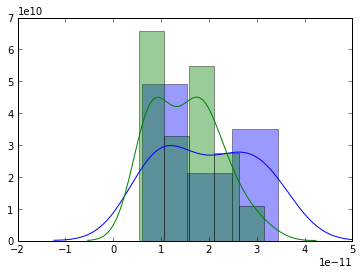

In [11]:
sns.distplot(amp_stim_bef)
sns.distplot(amp_stim_aft)
# plt.xlim([0, 1.4e-10])

(0, 1.4e-10)

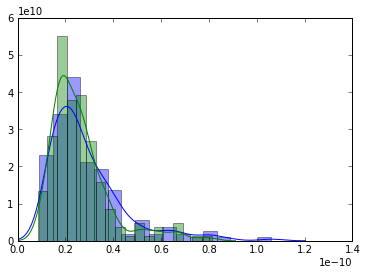

In [12]:
sns.distplot(para_bef['amp'])
sns.distplot(para_aft['amp'])
plt.xlim([0, 1.4e-10])

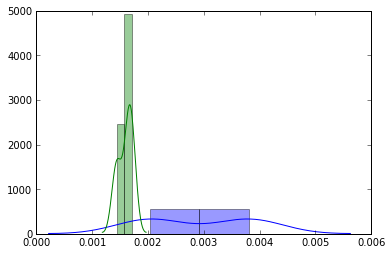

In [13]:
sns.distplot(decay_tau_stim_bef)
sns.distplot(decay_tau_stim_aft)

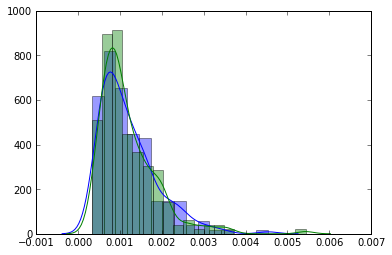

In [14]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(para_aft['decay_tau'])

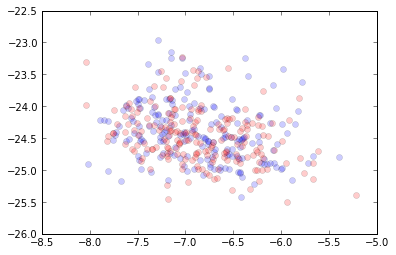

In [15]:
plt.plot(log_decay_bef,log_amp_bef , 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft , 'ro', alpha=0.2)
# plt.xlim([-8.5, -4.5])
# plt.ylim([-26.5, -23])

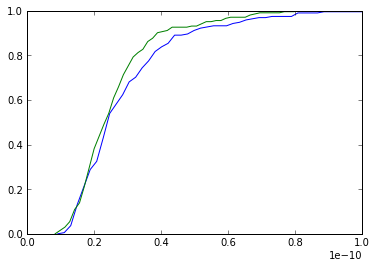

In [16]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

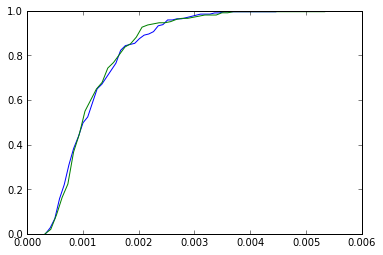

In [17]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['decay_tau'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['decay_tau'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)